<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Logistic_regression_with_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

x,y = make_moons(n_samples = 500, noise = .15 , random_state = 42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 42)

x

array([[ 8.30767107e-01, -3.72139046e-01],
       [ 8.95032420e-01,  8.58305917e-01],
       [ 1.07885688e+00, -4.77752842e-01],
       [-1.99520969e-01,  1.00657844e+00],
       [ 3.68136882e-01,  1.23808091e+00],
       [ 1.27760147e+00, -5.10531721e-01],
       [ 1.09848027e+00, -3.29066242e-01],
       [ 8.15223907e-02,  1.15907589e+00],
       [ 5.53647246e-01,  6.26287559e-01],
       [ 1.73315283e+00, -2.69697006e-01],
       [ 1.01010488e+00,  4.88038697e-02],
       [-5.84209273e-01,  4.45876594e-01],
       [ 1.62028870e+00, -5.69238653e-01],
       [ 3.03299364e-01,  7.48567028e-01],
       [ 1.24854743e+00, -5.05037923e-01],
       [ 1.24892026e+00, -5.13113099e-01],
       [ 1.98521500e+00,  3.73672060e-01],
       [ 9.36829666e-01,  4.43721815e-01],
       [ 5.78873302e-01, -5.20928782e-01],
       [ 1.65181458e+00, -3.32805334e-01],
       [ 1.93839553e+00,  3.04533800e-01],
       [ 2.15146176e+00,  4.33583374e-01],
       [-1.59327840e-01,  1.84928610e-01],
       [ 9.

In [4]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

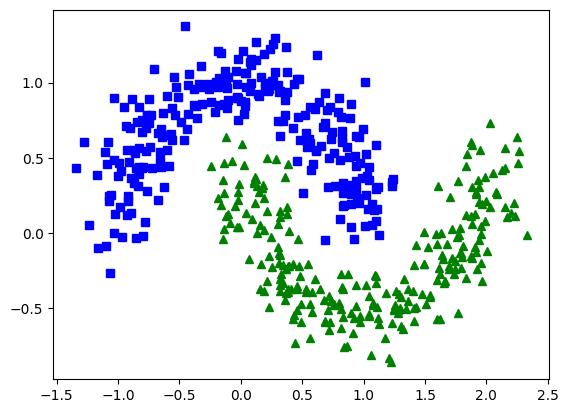

In [7]:
plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')

In [8]:
def plot_dataset(x,y,axes):
  plt.plot(x[:,0][y==0], x[:,1][y==0], "bs")
  plt.plot(x[:,0][y==1], x[:,1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True, which = 'both')

In [9]:
def plot_region(clf,axes):
  x0s = np.linspace(axes[0],axes[1], 100)
  x1s = np.linspace(axes[2],axes[3], 100)
  x0 ,x1 = np.meshgrid(x0s,x1s)
  x = np.array([x0.ravel(),x1.ravel()]).T
  y_pred = clf.predict(x).reshape(x0.shape)
  y_decision = clf.decision_function(x).reshape(x0.shape)
  plt.contour(x0, x1 , y_pred , cmap = plt.cm.brg, alpha = .2 )
  plt.contour(x0, x1 , y_decision , cmap = plt.cm.brg, alpha = .1 )


In [14]:
model_no_reg = Pipeline([
    ('Poly_features', PolynomialFeatures(degree = 10 , include_bias=False)),
    ("std_scaler" ,StandardScaler()),
    ('log_reg', LogisticRegression(C=1e10, solver='liblinear',random_state=42))
])

In [15]:
model_l2 = Pipeline([
    ('Poly_features', PolynomialFeatures(degree = 10 , include_bias=False)),
    ("std_scaler" ,StandardScaler()),
    ('log_reg', LogisticRegression(C=.1, solver='liblinear',random_state=42))
])

In [16]:
model_no_reg.fit(x_train,y_train)
model_l2.fit(x_train,y_train)

Pipeline(steps=[('Poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, random_state=42,
                                    solver='liblinear'))])

<Axes: title={'center': 'No Regualrization'}>

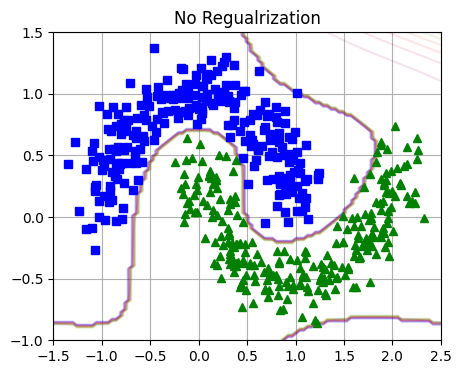

In [17]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_region(model_no_reg,[-1.5, 2.5 , -1, 1.5])
plot_dataset(x,y,[-1.5, 2.5 , -1, 1.5])
plt.title("No Regualrization")

plt.subplot(121)